In [7]:

import seaborn as sns
import pyprind
from sklearn.model_selection import train_test_split

# basic packages
import pandas as pd
import os
import numpy as np
import re # python regular expressions
import string # for efficient operations with strings
import matplotlib.pyplot as plt
%matplotlib inline

# For creating dictionaries that you can fill in a loop
from collections import defaultdict

# NLTK: A basic, popular NLP package. Find many examples of applications at https://www.nltk.org/book/
# Install guide: https://www.nltk.org/install.html
import nltk
nltk.download('punkt') # you will probably need to do this
nltk.download('wordnet') # and this
nltk.download('stopwords') # aand this

# for vectorization 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Vader Lexicon for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# similarity/distance measures
from scipy.spatial import distance
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Lexicons for sentiment analysis
from vaderSentiment import vaderSentiment
from afinn import Afinn

# to display images in notebook
from IPython.display import Image

from pandas.core.common import flatten
from collections import Counter
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /Users/mieharder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mieharder/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mieharder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'gensim'

In [8]:
#read dataframes
professor_df=pd.read_csv('df_final.csv')
comment_df=pd.read_csv('df_comments_final.csv')
comment_df['Dates']=pd.to_datetime(comment_df.Dates, format='%Y-%m-%d')
comment_df['Month']=comment_df['Dates'].dt.month

comment_df['Month'].value_counts()

,Unnamed: 0,Comments,Quality,Difficulty,Dates,TeacherID,SchoolID,status,Month
0,0,"Professor Acres is incredible--friendly, knowl...",5.0,4.0,2017-05-02,336888,780,top,5.0
1,1,He is an amazing professor- I definitely recom...,5.0,3.0,2017-04-28,336888,780,top,4.0
2,2,Great!,3.0,3.0,2012-03-23,336888,780,top,3.0
3,3,Awesome,5.0,1.0,2011-02-01,336888,780,top,2.0
4,4,Al is an absolutely great professor. His semin...,5.0,4.0,2007-10-21,336888,780,top,10.0
...,...,...,...,...,...,...,...,...,...
81712,81712,Difficult to understand and not very helpful. ...,1.5,3.0,2009-12-23,608528,4171,bottom,12.0
81713,81713,MUY MAL!! This teacher is unorganized and scat...,1.0,1.0,2005-12-22,608528,4171,bottom,12.0
81714,81714,very sweet disposition -- very willing to help...,5.0,1.0,2005-12-20,608528,4171,bottom,12.0
81715,81715,"This professor is very helpful, wants her stud...",5.0,1.0,2005-09-06,608528,4171,bottom,9.0


In [9]:
def preprocess(text):
    low_text= text.lower()
    low_text = low_text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(low_text)
    porter = nltk.WordNetLemmatizer()
    lemmatizer=[porter.lemmatize(t) for t in tokens]
    stop_words_list = stoppelop
    sent_sw_removed = [i for i in lemmatizer if i not in stop_words_list]
    lemmas=[i for i in sent_sw_removed if i!='br']
    return lemmas # return a list of stems/lemmas

<class 'str'>


<AxesSubplot:xlabel='Month', ylabel='Density'>

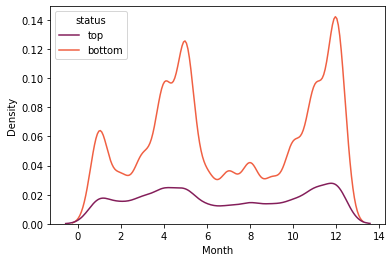

In [112]:
print(type(comment_df.Dates[0]))
plt.figure()
#plt.hist(comment_df.Quality)
#plt.hist(comment_df.Difficulty)
#sns.kdeplot(data=comment_df, x='Month') #antal reviews pr måned
sns.kdeplot(data=comment_df, x='Month', hue='status',palette='rocket')

In [14]:
comment_df=pd.read_csv('Tokenized_comment_df.csv')

,Unnamed: 0,Unnamed: 0.1,Comments,Quality,Difficulty,Dates,TeacherID,SchoolID,status,Month,Clean_comment
0,0,0,"Professor Acres is incredible--friendly, knowl...",5.0,4.0,2017-05-02,336888,780,top,5.0,"['professor', 'incrediblefriendly', 'knowledge..."
1,1,1,He is an amazing professor- I definitely recom...,5.0,3.0,2017-04-28,336888,780,top,4.0,"['amazing', 'professor', 'definitely', 'recomm..."
2,2,2,Great!,3.0,3.0,2012-03-23,336888,780,top,3.0,['great']
3,3,3,Awesome,5.0,1.0,2011-02-01,336888,780,top,2.0,['awesome']
4,4,4,Al is an absolutely great professor. His semin...,5.0,4.0,2007-10-21,336888,780,top,10.0,"['absolutely', 'great', 'professor', 'engaging..."
...,...,...,...,...,...,...,...,...,...,...,...
76867,81712,81712,Difficult to understand and not very helpful. ...,1.5,3.0,2009-12-23,608528,4171,bottom,12.0,"['difficult', 'understand', 'helpful', 'course..."
76868,81713,81713,MUY MAL!! This teacher is unorganized and scat...,1.0,1.0,2005-12-22,608528,4171,bottom,12.0,"['muy', 'mal', 'teacher', 'unorganized', 'scat..."
76869,81714,81714,very sweet disposition -- very willing to help...,5.0,1.0,2005-12-20,608528,4171,bottom,12.0,"['sweet', 'disposition', 'willing', 'help', 's..."
76870,81715,81715,"This professor is very helpful, wants her stud...",5.0,1.0,2005-09-06,608528,4171,bottom,9.0,"['professor', 'helpful', 'want', 'returned', '..."


In [10]:
with open('STOPlist.txt') as f:
    stoppelop = f.read().splitlines()

In [40]:
import ast

In [289]:
top_uni=comment_df[comment_df['status']=='top']
bottom_uni=comment_df[comment_df['status']=='bottom']
sub_top=list(flatten(list(top_uni.Clean_comment)))
sub_bottom=list(flatten(list(bottom_uni.Clean_comment)))


sub_top_high=top_uni[top_uni.Quality>4]
sub_top_low=top_uni[top_uni.Quality<2]
sub_bottom_high=bottom_uni[bottom_uni.Quality>4]
sub_bottom_low=bottom_uni[bottom_uni.Quality<2]
#list(flatten(list(sub_top_high.Clean_comment)))
hallo=list(flatten([ast.literal_eval(i) for i in list(sub_top_high.Clean_comment)]))


17512
59360
3.3896756509821837


In [56]:
comment_df['good_or_bad']= np.where(
    comment_df['Quality'] <=2 , 'bad', np.where(
    comment_df['Quality'] >=4 , 'good', 'average')) 

In [4]:
top_count=Counter(sub_top).most_common(10)
bottom_count=Counter(sub_bottom).most_common(10)

#Counter(list(flatten([ast.literal_eval(i) for i in list(sub_top_high.Clean_comment)]))).most_common(10) #top low #top high
#Counter(list(flatten([ast.literal_eval(i) for i in list(sub_top_low.Clean_comment)]))).most_common(10) #top low
Counter(list(flatten(list(sub_bottom_high.Clean_comment)))).most_common(10) #bottom high
#Counter(list(flatten(list(sub_bottom_low.Clean_comment)))).most_common(10) #bottom low


NameError: name 'sub_top' is not defined

In [71]:
bottom_uni

,Unnamed: 0,Unnamed: 0.1,Comments,Quality,Difficulty,Dates,TeacherID,SchoolID,status,Month,Clean_comment,good_or_bad
17512,19103,19103,he knows what hes talking about and will work ...,5.0,1.0,2012-11-30,145395,1197,bottom,11.0,"['know', 'talking', 'anything', 'ask']",good
17513,19104,19104,I learned almost nothing from his class. He le...,2.0,1.0,2012-08-26,145395,1197,bottom,8.0,"['learned', 'almost', 'nothing', 'class', 'let...",bad
17514,19105,19105,Dr. Aagaard is an awesome guy. He is energetic...,5.0,2.0,2012-05-02,145395,1197,bottom,5.0,"['awesome', 'energetic', 'tell', 'teaching', '...",good
17515,19106,19106,"This class was very easy, but Aagaard is very ...",3.5,1.0,2011-12-10,145395,1197,bottom,12.0,"['class', 'easy', 'disrespectful', 'slow', 're...",average
17516,19107,19107,"I was reading some trivia on ""dead poety socie...",5.0,2.0,2011-12-07,145395,1197,bottom,12.0,"['trivia', 'dead', 'poety', 'society', 'though...",good
...,...,...,...,...,...,...,...,...,...,...,...,...
76867,81712,81712,Difficult to understand and not very helpful. ...,1.5,3.0,2009-12-23,608528,4171,bottom,12.0,"['difficult', 'understand', 'helpful', 'course...",bad
76868,81713,81713,MUY MAL!! This teacher is unorganized and scat...,1.0,1.0,2005-12-22,608528,4171,bottom,12.0,"['muy', 'mal', 'teacher', 'unorganized', 'scat...",bad
76869,81714,81714,very sweet disposition -- very willing to help...,5.0,1.0,2005-12-20,608528,4171,bottom,12.0,"['sweet', 'disposition', 'willing', 'help', 's...",good
76870,81715,81715,"This professor is very helpful, wants her stud...",5.0,1.0,2005-09-06,608528,4171,bottom,9.0,"['professor', 'helpful', 'want', 'returned', '...",good


<AxesSubplot:xlabel='status', ylabel='Comment_length'>

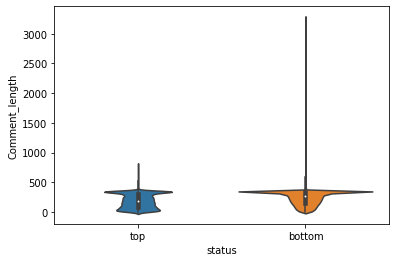

In [223]:
#df.tDept.value_counts()
#sns.kdeplot(data=comment_df, x='Quality', hue='Difficulty')
sns.violinplot(x='tDept', y='Comment_length', data=comment_df)
#comment_df

# FRA LIV

In [300]:
df_c=pd.read_csv('Tokenized_comment_df.csv')
#bottom universities
y= df_c['status']

X = df_c['Comments']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=161193)

In [301]:
import time
start = time.time()
tfidf = TfidfVectorizer(tokenizer=preprocess)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
end = time.time()
print(end-start)

428.4422688484192


In [1]:
features = ['_'.join(s.split()) for s in tfidf.get_feature_names()]
coefs_df = pd.DataFrame.from_records(coefficients, columns=features)
coefs_df

NameError: name 'tfidf' is not defined

In [338]:
## words with highest tf-idf-in training data
#print(X_train_tfidf.shape)
from sklearn.feature_extraction.text import TfidfVectorizer

#print(X_train_tfidf[0])
#feature_array = np.array(tfidf.get_feature_names())
#tfidf_sorting = np.argsort(X_train_tfidf.toarray()).flatten()[::-1]
#feature_names = np.array(tfidf.get_feature_names())
#print(features)

def get_top_tf_idf_words(X_train_tfidf, top_n=2):
    sorted_nzs = np.argsort(X_train_tfidf.data)[:-(top_n+1):-1]
    return feature_names[X_train_tfidf.indices[sorted_nzs]]
  
#print([get_top_tf_idf_words(X_train_tfidf,2) for X_train_tfidf in X_train_tfidf])

#[array(['key', 'words'], dtype='<U9'),
#array(['frequency', 'words'], dtype='<U9')
xtrain_as_list=list(X_train)
#print(xtrain_as_list[0])
test=xtrain_as_list[0]



In [334]:

tester=list(set(preprocess(test)))
print(tester)
print(len(tester))
hej=X_train_tfidf.toarray()
hej
print(X_train_tfidf[0])
tfidf.get_feature_names()

['taught', 'rude', 'class', 'helpful', 'pray', 'plan', 'good', 'nice', 'hardly', 'take', 'really']
11
  (0, 10945)	0.17959426325696945
  (0, 18827)	0.5261464080313957
  (0, 23651)	0.15738822183693088
  (0, 18417)	0.38748875122335086
  (0, 11789)	0.20928582689551242
  (0, 16559)	0.21511847266416995
  (0, 5010)	0.18842012126994578
  (0, 23745)	0.294989788640085
  (0, 20042)	0.1767374290060741
  (0, 11574)	0.4181209022939932
  (0, 21012)	0.31199107896604533


'good'

# FOR COUNTING WEIGHTED WORDS

In [285]:
dict_of_top_words_top={'backtests': 0, \
                  'declared': 0,\
                  'inferential': 0,\
                  'remarkably': 0,\
                  'eloquent': 0,\
                  'redemption': 0,\
                  'recommed': 0,\
                  'nobel': 0,\
                  'recycled': 0,\
                  'researeasch': 0}


dict_of_top_words_bottom={'pertaining': 0, \
                  'lawyer': 0,\
                  'preaches': 0,\
                  'hybrid': 0,\
                  'snack': 0,\
                  'purchase': 0,\
                  'smallest': 0,\
                  'breath': 0,\
                  'blog': 0,\
                  '19': 0}


dict_of_top_words_all={'backtests': 0, \
                  'declared': 0,\
                  'inferential': 0,\
                  'remarkably': 0,\
                  'eloquent': 0,\
                  'redemption': 0,\
                  'recommed': 0,\
                  'nobel': 0,\
                  'recycled': 0,\
                  'researeasch': 0}


In [86]:
## Joined top and bottom
for i in dict_of_top_words_all.keys():
    for j in range(len(comment_df.Clean_comment)):
        if i in comment_df.Clean_comment[j]:
            dict_of_top_words_all[i]+=1


In [281]:
#Top uni
for i in dict_of_top_words.keys():
    for j in range(len(top_uni.Clean_comment)):
        if i in top_uni.Clean_comment[j]:
            dict_of_top_words_top[i]+=1
dict_of_top_words_top

{'backtests': 13,
 'declared': 5,
 'inferential': 5,
 'remarkably': 12,
 'eloquent': 18,
 'redemption': 4,
 'recommed': 6,
 'nobel': 20,
 'recycled': 5,
 'researeasch': 2}

In [286]:
#bottom uni
for i in dict_of_top_words_bottom.keys():
    for j in range(len(bottom_uni.Clean_comment)):
        if i in bottom_uni.Clean_comment[j]:
            dict_of_top_words_bottom[i]+=1
dict_of_top_words_bottom

{'pertaining': 21,
 'lawyer': 37,
 'preaches': 29,
 'hybrid': 133,
 'snack': 24,
 'purchase': 69,
 'smallest': 44,
 'breath': 69,
 'blog': 51,
 '19': 200}

In [283]:
#lol
for i in dict_of_top_words_top.keys():
    for j in range(len(bottom_uni.Clean_comment)):
        if i in bottom_uni.Clean_comment[j]:
            dict_of_top_words_top[i]+=1
dict_of_top_words_top

{'backtests': 0,
 'declared': 0,
 'inferential': 0,
 'remarkably': 2,
 'eloquent': 6,
 'redemption': 0,
 'recommed': 3,
 'nobel': 0,
 'recycled': 1,
 'researeasch': 0}

In [277]:
for i in dict_of_top_words_top.keys():
    for j in range(len(top_uni.Clean_comment)):
        if i in top_uni.Clean_comment[j]:
            print(i, '\n',top_uni.Comments[j], '\n', top_uni.Quality[j], '\n')

backtests 
 An A is super easy to get in this course by just doing the backtests he posts online before the midterms and the exam 
 2.0 

backtests 
 She definitely does make you work for it. However, it is a rewarding experience. Grading wise, she's pretty clear in what she expects. Lab reports are very straight forward as she gives you the specific wording to use. Exams are challenging because there are no backtests (the legend is no one has a past exam) and she focuses on details and concepts 
 2.0 

backtests 
 Very bad lecturer. Better off getting explanations at his office hours. TAs won't help you. He offers a generous grade line and offers extra credit quizzes from time to time. The exams are really similar to the backtests so best bet is to study those first before exams. 
 1.0 

backtests 
 Going into Orgo as a freshman was terrifying, yet it's now my easiest class. Falzone's grading makes an 80 and A, and you'll likely do better than that. He drops 3/8 quizzes, replaces lowe

redemption 
 Prof. Blazej is an exceptional educator and has my utmost respect. His classes are truly enjoyable and thought-provoking. Additionally, he communicates his expectations clearly and grades assignments very reasonably. Lastly, he has very gracious extra credit and deadline redemption policies. Take one of his classes, I guarantee you won't regret it! 
 5.0 

redemption 
 This professor is beyond redemption.No one can save him. 
 1.0 

redemption 
 His class is not easy but he has a great grading system where he will drop an exam grade and offer final redemption. Going to lectures is beneficial but he doesn't care if you don't go. Do well on homework. Do as many homework problems as possible. He will curve the class fairly to a B, he isn't a jerk. But he gets frustrated if you ask questions. 
 3.0 

redemption 
 Klein is a great lecturer but summer orgo is not worth it. Cramming that much material into 6 weeks is ridiculously hard. Most of the A's in this class go to the peop

In [223]:
print(dict_of_top_words_top, '\n', dict_of_top_words_bottom)

{'backtests': 13, 'declared': 5, 'inferential': 5, 'remarkably': 12, 'eloquent': 18, 'redemption': 4, 'recommed': 6, 'nobel': 20, 'recycled': 5, 'researeasch': 2} 
 {'pertaining': 21, 'lawyer': 37, 'preaches': 29, 'hybrid': 133, 'snack': 24, 'purchase': 69, 'smallest': 44, 'breath': 69, 'blog': 51, '19': 200}


In [224]:
top_words_top=pd.DataFrame.from_dict(dict_of_top_words_top, orient='index')
top_words_bottom=pd.DataFrame.from_dict(dict_of_top_words_bottom, orient='index')

In [225]:
top_words_top['status']=['top' for i in range(len(top_words_top))]
top_words_bottom['status']=['bottom' for i in range(len(top_words_bottom))]


In [299]:
top_words_top[0]

backtests      13
declared        5
inferential     5
remarkably     12
eloquent       18
redemption      4
recommed        6
nobel          20
recycled        5
researeasch     2
Name: 0, dtype: int64

In [198]:
coefs_df=pd.read_csv('coef_final.csv').round(decimals=4)
hej=list(coefs_df.iloc[0])
lort=coefs_df.T.sort_values(by=[0]).reset_index(drop=True).reset_index()
lort=lort.rename(columns={"index":"xval"}).rename(columns={0:"yval"})

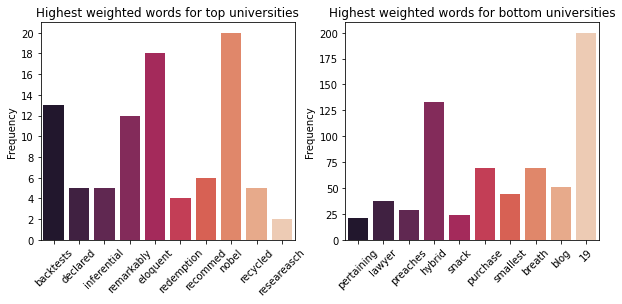

In [297]:
fig, ax =plt.subplots(1,2, sharey=False, figsize=(10,4))
#first plot
ax[0]=sns.barplot(data=top_words_top, x=list(top_words_top.index), y=top_words_top[0],palette='rocket', ax=ax[0])
ax[0].set_ylabel('Frequency')
ax[0].title.set_text('Highest weighted words for top universities')
ax[0].set(ylim=(0, 21), yticks=[2*x for x in range(11)])
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
#second plot
ax[1]=sns.barplot(data=top_words_bottom, x=list(top_words_bottom.index), y=top_words_bottom[0],palette='rocket', ax=ax[1])
#ax[1].set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax[1].set_ylabel('Frequency')
ax[1].title.set_text('Highest weighted words for bottom universities')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
plt.savefig('topbottom10.png',bbox_inches='tight')


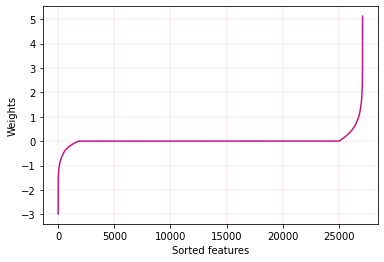

In [218]:

plt.plot(lort['xval'], lort.yval, color='mediumvioletred')
plt.grid(color='mediumvioletred', linestyle='-', linewidth=0.1)
plt.xlabel('Sorted features')
plt.ylabel('Weights')
plt.savefig('weights.png')

In [291]:
from  matplotlib.ticker import FuncFormatter

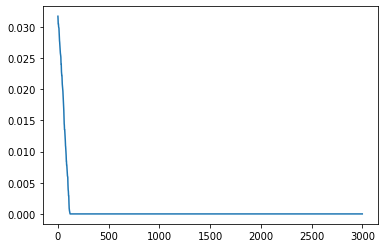

In [161]:
hallo=sorted(hej, reverse=True)[2000:5000]
plt.plot([i for i in range(len(hallo))], hallo)